### Author: Darren Colby
### Date: 3/20/2022
### Purpose: To test the gradient descent implementation

## Basice setup
The cells below import the necessary libraries and read in the data to test the gradient descent implementation. The dataset here is based on Kliener's Law, which relates metabolic rates to body mass.

In [1]:
# Imports
import autograd.numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from os import chdir

# Enable inline plotting
%matplotlib inline

In [2]:
# Read in the dataset
csvname = 'kleibers_law_data.csv'
data = np.loadtxt(csvname, delimiter=',')
x = np.log(data[:-1, :])
y = np.log(data[-1:, :])

## Visualizing the data
It is always a good idea to do this before developing any models.

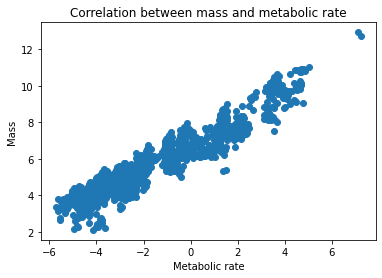

In [3]:
# Take a look at the data
plt.scatter(x, y)

plt.title("Correlation between mass and metabolic rate")
plt.xlabel("Metabolic rate")
plt.ylabel("Mass")

plt.show()

## Linear regression
The cells below implement linear regression and the least squares cost function to be passed to the gradient descent implementation.

In [4]:
# Linear regression
def model(w, x):
    """Predicts an outcome as a linenar combination of features and weights
            @param w: a numpy array of weights
            @param x: a numpy array of features
        @returns: the predicted outcome
        """
    return np.dot(x.T, w[1:]) + w[0]

In [5]:
# Least squares cost function
def least_squares(w, x, y):    
    """Calculates the MSE of a model
            @param w: a numpy array of weights
            @param x: a numpy array of features
            @param y: the actual value
        @returns: the mean squared error of the model with the given weights and bias"""
    return np.sum((model(w, x) - y)**2) / float(y.size)

## Gradient descent time!
We can test the gradient descent function and see how batch, minibatch, and stochastic gradient descent converge relative to each other.

In [6]:
chdir('C:/Users/Darren Colby/Downloads')

from gradient_descent import gradient_descent

We will use the parameters below with batch, minibatch, and stochastic gradient descent.

g = least_squares function you implemented

w = [w_0, w_1]  , where w_0 and w_1 are random numbers between -0.1 and 0.1

max_its=1000

alpha=0.01

In [7]:
# Run gradient descent
batch = gradient_descent(least_squares, 0.01, 200, np.repeat(np.random.uniform(-0.1, 0.1), 2), x, y, 'batch', random_state=9)
minibatch = gradient_descent(least_squares, 0.01, 200, np.repeat(np.random.uniform(-0.1, 0.1), 2), x, y, 'sgd', random_state=9)
sgd = gradient_descent(least_squares, 0.01, 200, np.repeat(np.random.uniform(-0.1, 0.1), 2), x, y, 'sgd', 1, random_state=9)

## Comparing convergence
Each variant of gradient descent has pros and cons. In general, batch gradient descent has a smoother convergence but uses more memory. Stochastic gradient descent uses a minimal amount of memory but is very noisy and minibatch gradient descent is a compromise between the two. The plot below shows how each of these variants converge towards the optimal weights.

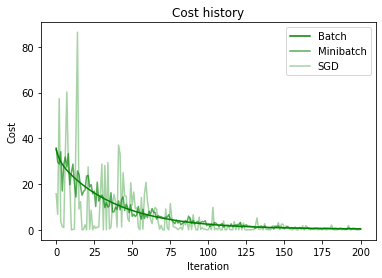

In [8]:
# Checking the convergence
plot1, ax = plt.subplots()

# Add cost histories
ax.plot(batch[1], color='green')
ax.plot(minibatch[1], color="green", alpha=0.65)
ax.plot(sgd[1], color='green', alpha=0.35)

# make the plot informative
ax.set_title("Cost history")
ax.legend(["Batch", "Minibatch", "SGD"])
ax.xaxis.set_label_text("Iteration")
ax.yaxis.set_label_text("Cost")

plt.show()

## Comparing the fitted models
Since there is a tochastic element to gradient descent, the fitted line from each variant of gradient descent will be slightly different. The plot below shows this.

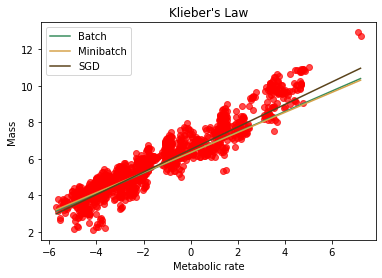

In [9]:
# Make input values to predict labels for
x_pred = np.linspace(np.min(x), np.max(x))

# Get predictions from batch gradient descent
batch_weights = batch[0][-1]
batch_predictions = batch_weights[1]*x_pred + batch_weights[0]

# Get predictions from minibatch gradient descent
minibatch_weights = minibatch[0][-1]
minibatch_predictions = minibatch_weights[1]*x_pred + minibatch_weights[0]

# Get predictions from stochastic gradient descent
sgd_weights = sgd[0][-1]
sgd_predictions = sgd_weights[1]*x_pred + sgd_weights[0]

# Instantiate the plot
plot2, ax = plt.subplots()

# Make a basic plot
ax.scatter(x, y, color="red", alpha=0.7, label="_nolegend_")
ax.plot(x_pred, batch_predictions, color="#388d5d")
ax.plot(x_pred, minibatch_predictions, color="#d6a34a")
ax.plot(x_pred, sgd_predictions, color="#5a431b")

# Add informative text
ax.set_title("Klieber's Law")
ax.legend(["Batch", "Minibatch", "SGD"])
ax.xaxis.set_label_text("Metabolic rate")
ax.yaxis.set_label_text("Mass")

plt.show()